In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import csv
import folium
from folium import plugins
import geopandas as gpd

In [6]:
df_airbnb = pd.read_csv("info_total_airbnb.csv")

In [7]:
df_airbnb

,precio,titulo_anuncio,tipo_alojamineto,n_personas,n_dormitorios,n_camas,n_banos,valoracion,n_evaluaciones,comunidad,url
0,95.0,Casa Eulogia,casa,8,3,5,1,4.99,69,islas_canarias,https://www.airbnb.es/rooms/39001698?adults=1&...
1,50.0,Caracola,piso,4,2,4,1,4.36,33,islas_canarias,https://www.airbnb.es/rooms/36503661?adults=1&...
2,79.0,~Finca Corona,piso,2,1,1,1,4.94,16,islas_canarias,https://www.airbnb.es/rooms/779833689599725634...
3,55.0,"Casa El Pozo ""la Casa del Fin Del Mundo""",piso,2,1,1,1,4.81,67,islas_canarias,https://www.airbnb.es/rooms/43763311?adults=1&...
4,46.0,Leonidas ( Wifi - Netflix -Ozono+UV ),piso,2,1,1,1,4.96,216,islas_canarias,https://www.airbnb.es/rooms/22873993?adults=1&...
...,...,...,...,...,...,...,...,...,...,...,...
1316,85.0,Casaicon2 un lugar escondido en el paisaje,piso,3,1,2,1,4.91,88,castilla_la_mancha,https://www.airbnb.es/rooms/27195686?adults=1&...
1317,58.0,Casa la Tercia. Centro,piso,6,2,3,3,5.00,12,castilla_la_mancha,https://www.airbnb.es/rooms/755020741967391057...
1318,54.0,Alojamiento 6 con piscina y zonas comunes,piso,2,1,1,1,4.92,25,extremadura,https://www.airbnb.es/rooms/620064152871207881...
1319,50.0,Vaciabotas Precioso loft en zona rural,piso,2,1,1,1,4.87,53,extremadura,https://www.airbnb.es/rooms/50851198?adults=1&...


In [8]:
columns_to_round = ['n_personas', 'n_dormitorios', 'n_camas', 'n_banos']
df_airbnb[columns_to_round] = df_airbnb[columns_to_round].round()

In [9]:
df_airbnb['n_personas'] = df_airbnb['n_personas'].astype(int)

In [10]:
df_airbnb['n_dormitorios'] = df_airbnb['n_dormitorios'].astype(int)

In [11]:
df_airbnb['n_camas'] = df_airbnb['n_camas'].astype(int)

In [12]:
df_airbnb

,precio,titulo_anuncio,tipo_alojamineto,n_personas,n_dormitorios,n_camas,n_banos,valoracion,n_evaluaciones,comunidad,url
0,95.0,Casa Eulogia,casa,8,3,5,1,4.99,69,islas_canarias,https://www.airbnb.es/rooms/39001698?adults=1&...
1,50.0,Caracola,piso,4,2,4,1,4.36,33,islas_canarias,https://www.airbnb.es/rooms/36503661?adults=1&...
2,79.0,~Finca Corona,piso,2,1,1,1,4.94,16,islas_canarias,https://www.airbnb.es/rooms/779833689599725634...
3,55.0,"Casa El Pozo ""la Casa del Fin Del Mundo""",piso,2,1,1,1,4.81,67,islas_canarias,https://www.airbnb.es/rooms/43763311?adults=1&...
4,46.0,Leonidas ( Wifi - Netflix -Ozono+UV ),piso,2,1,1,1,4.96,216,islas_canarias,https://www.airbnb.es/rooms/22873993?adults=1&...
...,...,...,...,...,...,...,...,...,...,...,...
1316,85.0,Casaicon2 un lugar escondido en el paisaje,piso,3,1,2,1,4.91,88,castilla_la_mancha,https://www.airbnb.es/rooms/27195686?adults=1&...
1317,58.0,Casa la Tercia. Centro,piso,6,2,3,3,5.00,12,castilla_la_mancha,https://www.airbnb.es/rooms/755020741967391057...
1318,54.0,Alojamiento 6 con piscina y zonas comunes,piso,2,1,1,1,4.92,25,extremadura,https://www.airbnb.es/rooms/620064152871207881...
1319,50.0,Vaciabotas Precioso loft en zona rural,piso,2,1,1,1,4.87,53,extremadura,https://www.airbnb.es/rooms/50851198?adults=1&...


In [13]:
precio_medio = df_airbnb.groupby('comunidad')['precio'].mean()

In [14]:
precio_medio

comunidad
andalucia                60.934426
aragon                   79.333333
asturias                 82.563636
baleares                 94.022917
cantabria                94.301587
castilla_la_mancha       72.227273
castilla_y_leon          83.618421
cataluña                 82.526316
ceuta                    72.456522
comunidad_valenciana     53.510204
extremadura              84.639535
galicia                  97.179104
islas_canarias           51.311475
la_rioja                 91.975610
madrid                   47.888889
melilla                  65.250000
murcia                   61.529412
navarra                 103.863014
pais_vasco               87.680321
valencia                 55.958333
Name: precio, dtype: float64

In [15]:
df_airbnb_mean = pd.DataFrame(precio_medio.items(), columns=['comunidad', 'precio_medio'])

In [16]:
df_airbnb_mean

,comunidad,precio_medio
0,andalucia,60.934426
1,aragon,79.333333
2,asturias,82.563636
3,baleares,94.022917
4,cantabria,94.301587
5,castilla_la_mancha,72.227273
6,castilla_y_leon,83.618421
7,cataluña,82.526316
8,ceuta,72.456522
9,comunidad_valenciana,53.510204


In [17]:
grupo_comunidad_tipo = df_airbnb.groupby(['comunidad', 'tipo_alojamineto']).size().unstack()

In [25]:
grupo_comunidad_tipo = grupo_comunidad_tipo.fillna('0')

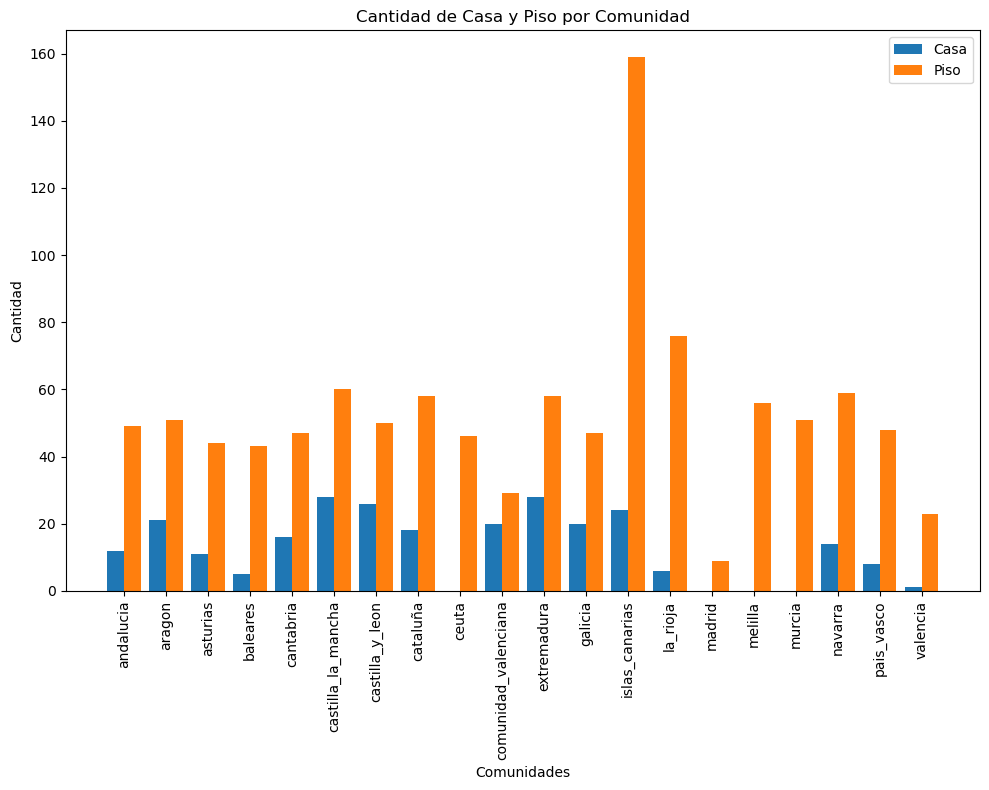

In [26]:
comunidades = [
    "andalucia", "aragon", "asturias", "baleares", "cantabria",
    "castilla_la_mancha", "castilla_y_leon", "cataluña", "ceuta",
    "comunidad_valenciana", "extremadura", "galicia", "islas_canarias",
    "la_rioja", "madrid", "melilla", "murcia", "navarra", "pais_vasco", "valencia"
]

casas = [12.0, 21.0, 11.0, 5.0, 16.0, 28.0, 26.0, 18.0, 0, 20.0, 28.0, 20.0, 24.0, 6.0, 0, 0, 0, 14.0, 8.0, 1.0]
pisos = [49.0, 51.0, 44.0, 43.0, 47.0, 60.0, 50.0, 58.0, 46.0, 29.0, 58.0, 47.0, 159.0, 76.0, 9.0, 56.0, 51.0, 59.0, 48.0, 23.0]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.4
index = range(len(comunidades))

bar1 = ax.bar(index, casas, bar_width, label='Casa')
bar2 = ax.bar([i + bar_width for i in index], pisos, bar_width, label='Piso')

ax.set_xlabel('Comunidades')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Casa y Piso por Comunidad')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(comunidades, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [82]:
total_casa_piso = df_airbnb.groupby(['comunidad', 'tipo_alojamineto']).size().unstack().sum()

In [83]:
total_casa_piso

tipo_alojamineto
casa     258.0
piso    1063.0
dtype: float64

In [84]:
anuncios = df_airbnb.groupby(['comunidad']).size()

In [108]:
anuncios

comunidad
andalucia                61
aragon                   72
asturias                 55
baleares                 48
cantabria                63
castilla_la_mancha       88
castilla_y_leon          76
cataluña                 76
ceuta                    46
comunidad_valenciana     49
extremadura              86
galicia                  67
islas_canarias          183
la_rioja                 82
madrid                    9
melilla                  56
murcia                   51
navarra                  73
pais_vasco               56
valencia                 24
dtype: int64

In [103]:
n_anuncios = pd.DataFrame(anuncios.items(), columns=['comunidad', 'n_anuncios'])

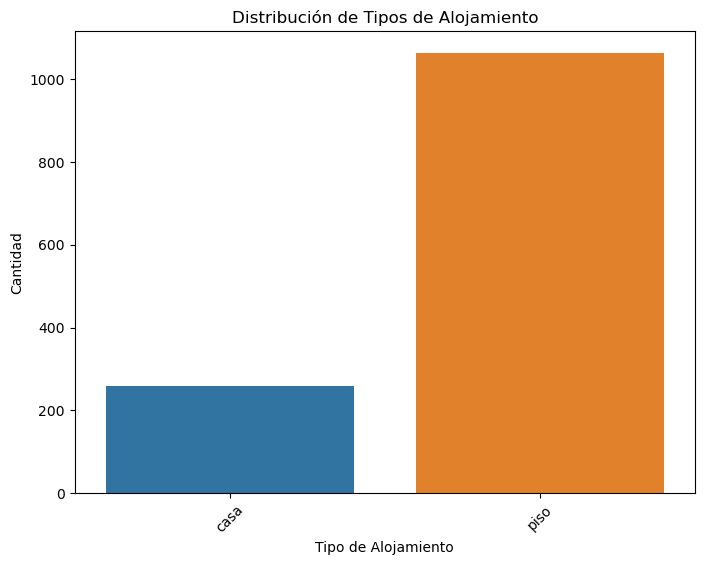

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_airbnb, x='tipo_alojamineto')
plt.title('Distribución de Tipos de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

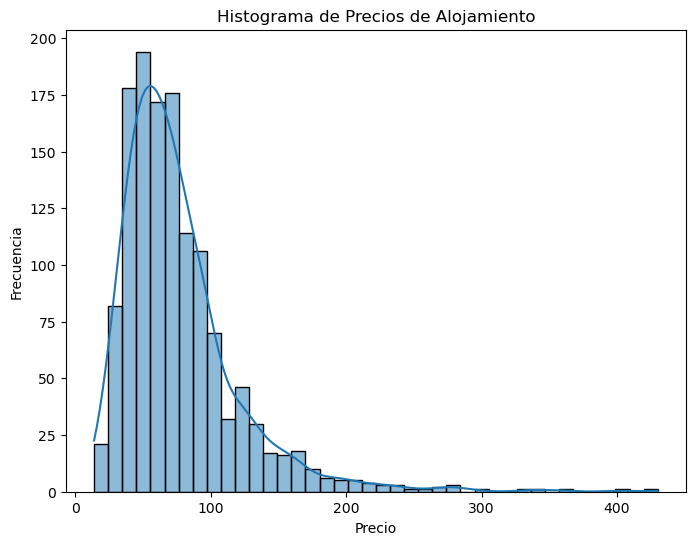

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_airbnb, x='precio', bins=40, kde=True)
plt.title('Histograma de Precios de Alojamiento')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Siro_\AppData\Local\Temp\ipykernel_4584\1749856236.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



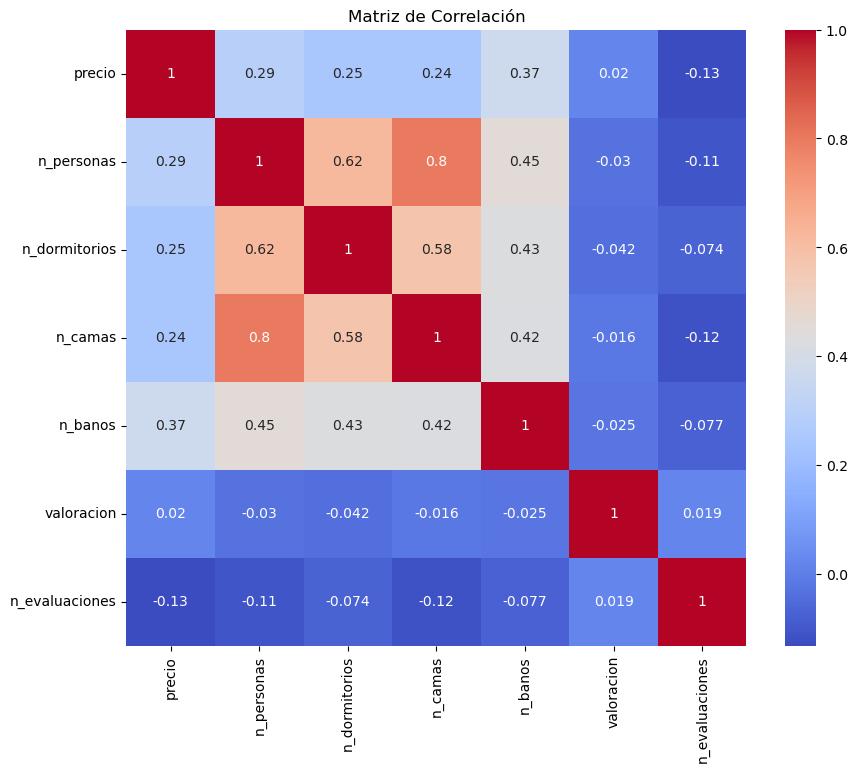

In [72]:
correlation_matrix = df_airbnb.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

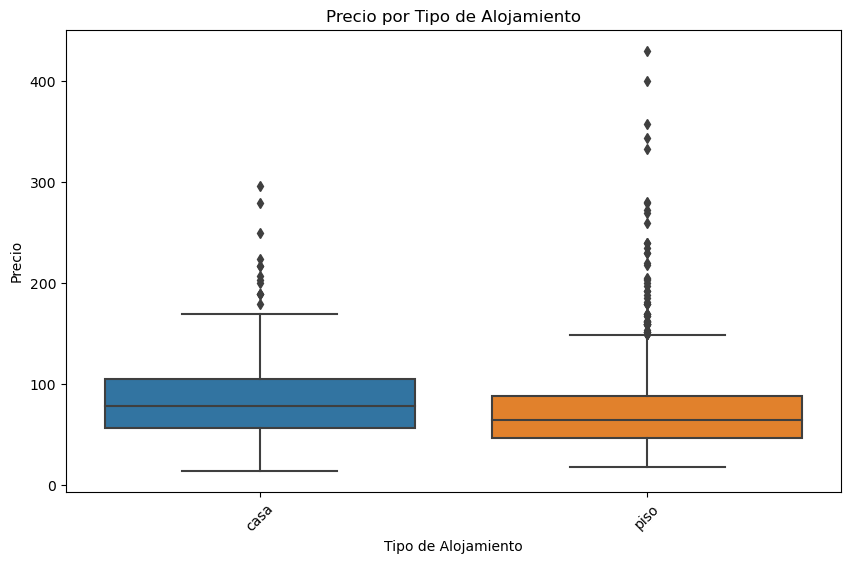

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='tipo_alojamineto', y='precio')
plt.title('Precio por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

In [121]:
ub_shp = 'gadm36_ESP_shp/gadm36_ESP_1.shp'

espania = gpd.read_file(ub_shp, encoding='utf-8')

In [122]:
espania['NAME_1']

0                      Andalucía
1                         Aragón
2                      Cantabria
3             Castilla-La Mancha
4                Castilla y León
5                       Cataluña
6                Ceuta y Melilla
7            Comunidad de Madrid
8     Comunidad Foral de Navarra
9           Comunidad Valenciana
10                   Extremadura
11                       Galicia
12                Islas Baleares
13                Islas Canarias
14                      La Rioja
15                    País Vasco
16        Principado de Asturias
17              Región de Murcia
Name: NAME_1, dtype: object

In [123]:
espania

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,ESP,Spain,ESP.1_1,Andalucía,Andalousie|Andaluc¡a|Andalusien|Andaluzia,NaN,Comunidad Autónoma,Autonomous Community,01,ES.AN,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,ESP,Spain,ESP.2_1,Aragón,Aragão|Aragó|Aragón|Aragona|Aragonien,NaN,Comunidad Autónoma,Autonomous Community,15,ES.AR,"POLYGON ((0.02648 40.69497, 0.02688 40.70039, ..."
2,ESP,Spain,ESP.3_1,Cantabria,Cantàbria|Cantábria|Cantabrie|Kantabrien,NaN,Comunidad Autónoma,Autonomous Community,06,ES.CB,"MULTIPOLYGON (((-3.90653 43.47792, -3.90653 43..."
3,ESP,Spain,ESP.4_1,Castilla-La Mancha,Castela-La Mancha|Castela-Mancha|Castella-la M...,NaN,Comunidad Autónoma,Autonomous Community,08,ES.CM,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40..."
4,ESP,Spain,ESP.5_1,Castilla y León,Castile and Leon|Castela e Leão|Castella i Lle...,NaN,Comunidad Autónoma,Autonomous Community,07,ES.CL,"MULTIPOLYGON (((-4.08899 42.79987, -4.10097 42..."
5,ESP,Spain,ESP.6_1,Cataluña,Catalogna|Catalogne|Catalonia|Catalunha|Catalu...,NaN,Comunidad Autónoma,Autonomous Community,09,ES.CT,"MULTIPOLYGON (((0.72958 40.78069, 0.72958 40.7..."
6,ESP,Spain,ESP.7_1,Ceuta y Melilla,NaN,NaN,Ciudades Autónomas,Autonomous City,19,ES.ML,"MULTIPOLYGON (((-4.29847 35.17058, -4.29847 35..."
7,ESP,Spain,ESP.8_1,Comunidad de Madrid,Madrid|Communauté de Madrid| Community of Madr...,NaN,Comunidad Autónoma,Autonomous Community,NaN,ES.MD,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."
8,ESP,Spain,ESP.9_1,Comunidad Foral de Navarra,Communauté forale de Navarre|Comunidade Foral ...,NaN,Comunidad Autónoma,Autonomous Community,15,ES.NA,"POLYGON ((-1.84713 42.00800, -1.84898 42.00526..."
9,ESP,Spain,ESP.10_1,Comunidad Valenciana,Valencia|Communauté de Valence|Comunidade Vale...,NaN,Comunidad Autónoma,Autonomous Community,10,ES.VC,"MULTIPOLYGON (((-0.45708 38.16208, -0.45708 38..."


In [124]:
name_mapping = {
    'Islas Canarias': 'islas_canarias',
    'Cataluña': 'cataluña',
    'País Vasco': 'pais_vasco',
    'Extremadura': 'extremadura',
    'Ceuta y Melilla': 'melilla',
    'Castilla-La Mancha': 'castilla_la_mancha',
    'Principado de Asturias': 'asturias',
    'Región de Murcia': 'murcia',
    'La Rioja': 'la_rioja',
    'Islas Baleares': 'baleares',
    'Comunidad de Madrid': 'madrid',
    'Comunidad Valenciana': 'comunidad_valenciana',
    'Comunidad Foral de Navarra': 'navarra',
    'Castilla y León': 'castilla_y_leon',
    'Aragón': 'aragon',
    'Galicia': 'galicia',
    'Andalucía': 'andalucia',
    'Comunidad Valenciana': 'valencia',
    'Cantabria': 'cantabria'
}

espania['NAME_1'] = espania['NAME_1'].replace(name_mapping)

In [125]:
espania

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,ESP,Spain,ESP.1_1,andalucia,Andalousie|Andaluc¡a|Andalusien|Andaluzia,NaN,Comunidad Autónoma,Autonomous Community,01,ES.AN,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,ESP,Spain,ESP.2_1,aragon,Aragão|Aragó|Aragón|Aragona|Aragonien,NaN,Comunidad Autónoma,Autonomous Community,15,ES.AR,"POLYGON ((0.02648 40.69497, 0.02688 40.70039, ..."
2,ESP,Spain,ESP.3_1,cantabria,Cantàbria|Cantábria|Cantabrie|Kantabrien,NaN,Comunidad Autónoma,Autonomous Community,06,ES.CB,"MULTIPOLYGON (((-3.90653 43.47792, -3.90653 43..."
3,ESP,Spain,ESP.4_1,castilla_la_mancha,Castela-La Mancha|Castela-Mancha|Castella-la M...,NaN,Comunidad Autónoma,Autonomous Community,08,ES.CM,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40..."
4,ESP,Spain,ESP.5_1,castilla_y_leon,Castile and Leon|Castela e Leão|Castella i Lle...,NaN,Comunidad Autónoma,Autonomous Community,07,ES.CL,"MULTIPOLYGON (((-4.08899 42.79987, -4.10097 42..."
5,ESP,Spain,ESP.6_1,cataluña,Catalogna|Catalogne|Catalonia|Catalunha|Catalu...,NaN,Comunidad Autónoma,Autonomous Community,09,ES.CT,"MULTIPOLYGON (((0.72958 40.78069, 0.72958 40.7..."
6,ESP,Spain,ESP.7_1,melilla,NaN,NaN,Ciudades Autónomas,Autonomous City,19,ES.ML,"MULTIPOLYGON (((-4.29847 35.17058, -4.29847 35..."
7,ESP,Spain,ESP.8_1,madrid,Madrid|Communauté de Madrid| Community of Madr...,NaN,Comunidad Autónoma,Autonomous Community,NaN,ES.MD,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."
8,ESP,Spain,ESP.9_1,navarra,Communauté forale de Navarre|Comunidade Foral ...,NaN,Comunidad Autónoma,Autonomous Community,15,ES.NA,"POLYGON ((-1.84713 42.00800, -1.84898 42.00526..."
9,ESP,Spain,ESP.10_1,valencia,Valencia|Communauté de Valence|Comunidade Vale...,NaN,Comunidad Autónoma,Autonomous Community,10,ES.VC,"MULTIPOLYGON (((-0.45708 38.16208, -0.45708 38..."


In [146]:
espania_airbnb = espania.merge(df_airbnb, left_on="NAME_1", right_on="comunidad")

In [147]:
espania_airbnb = espania_airbnb[espania_airbnb['NAME_1'] != 'islas_canarias']

In [148]:
espania_airbnb_mean = espania.merge(df_airbnb_mean, left_on="NAME_1", right_on="comunidad")

In [149]:
espania_airbnb_mean = espania_airbnb_mean[espania_airbnb_mean['NAME_1'] != 'islas_canarias']

In [150]:
espania_n_anuncios = espania.merge(n_anuncios, left_on="NAME_1", right_on="comunidad")

In [151]:
espania_n_anuncios = espania_n_anuncios[espania_n_anuncios['NAME_1'] != 'islas_canarias']

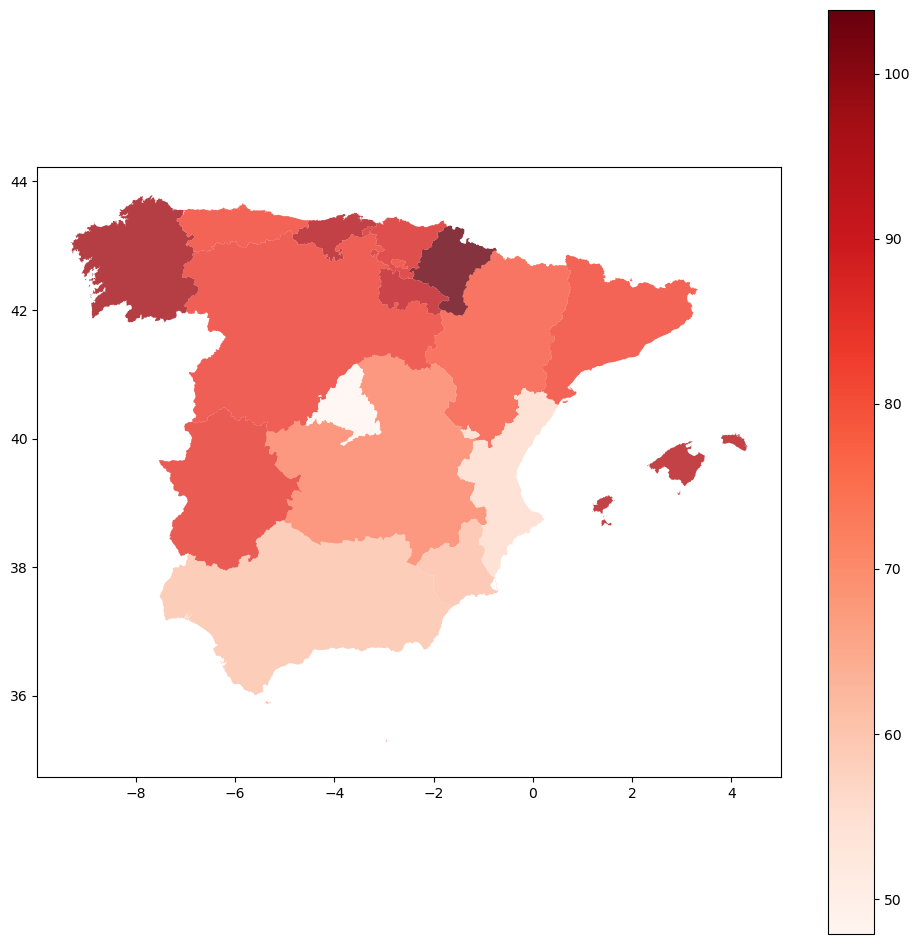

In [156]:
my_map_precio_mean = espania_airbnb_mean.plot(column="precio_medio", linewidth=0.3, cmap="Reds", k=8, alpha=0.8, legend=True, figsize=(12,12))
plt.show()

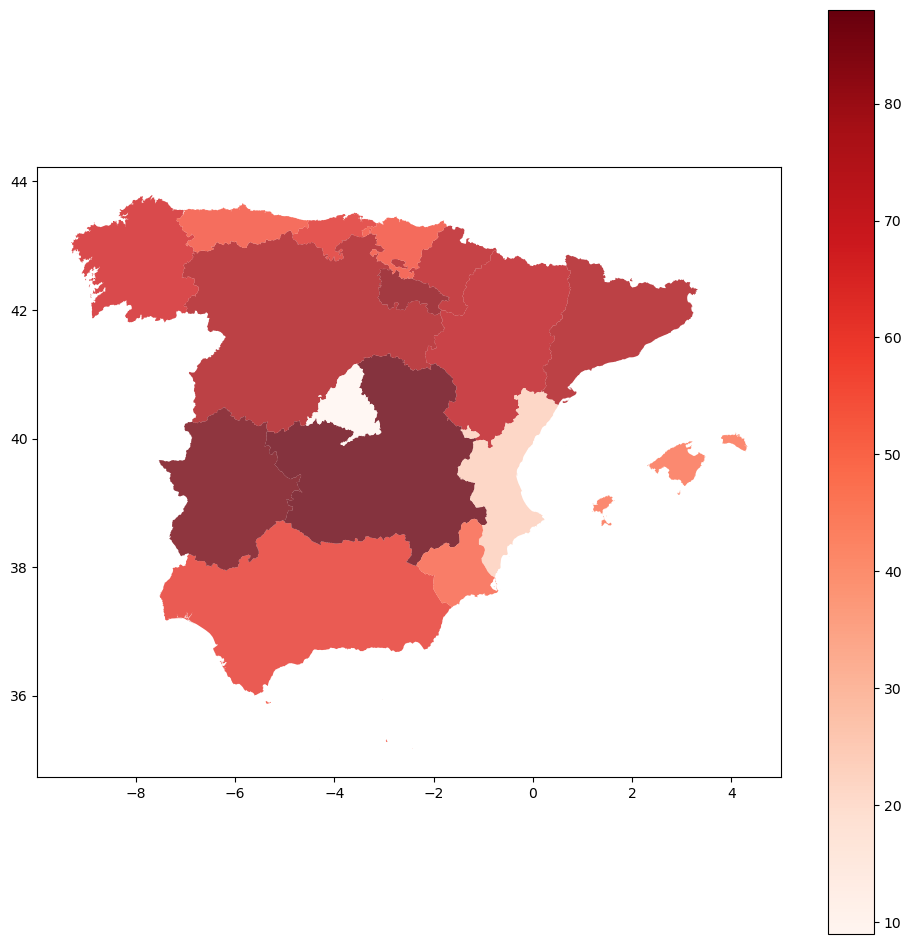

In [157]:
my_map_n_anuncios = espania_n_anuncios.plot(column="n_anuncios", linewidth=0.3, cmap="Reds", k=8, alpha=0.8, legend=True, figsize=(12,12))
plt.show()

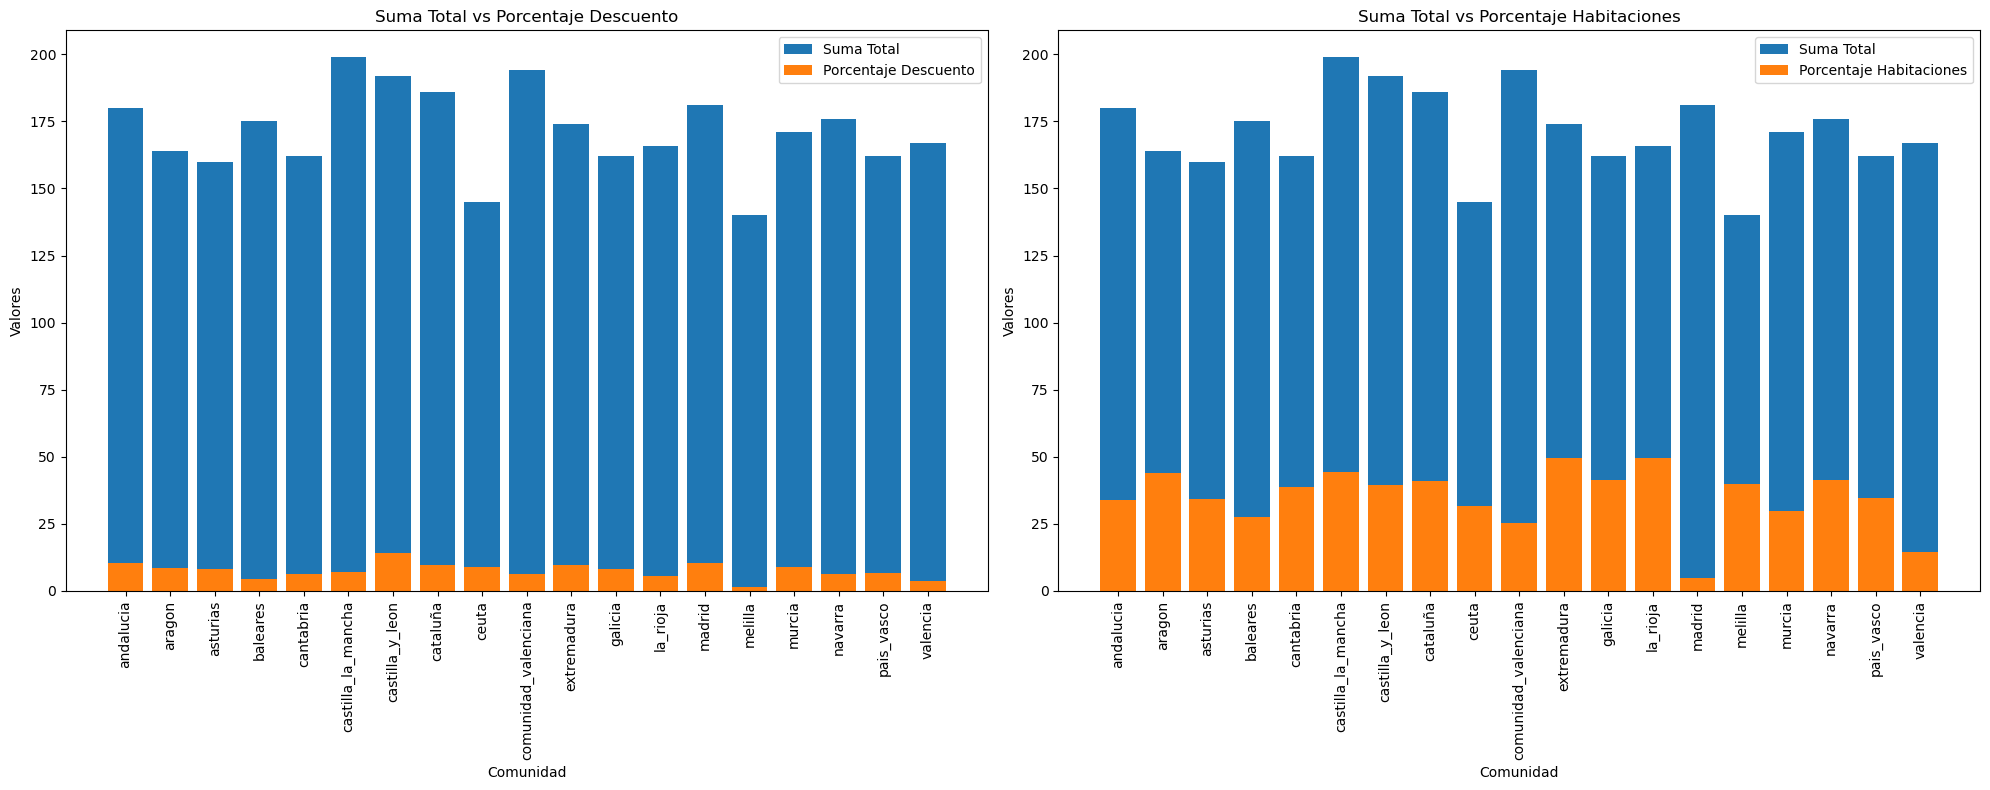

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('resultado_con_porcentajes_total.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Tamaño aumentado


ax1.bar(data['Comunidad'], data['suma_total'], label='Suma Total')
ax1.bar(data['Comunidad'], data['porcentaje_descuento'], label='Porcentaje Descuento')
ax1.set_xlabel('Comunidad')
ax1.set_ylabel('Valores')
ax1.set_title('Suma Total vs Porcentaje Descuento')
ax1.legend()
ax1.tick_params(axis='x', rotation=90) 


ax2.bar(data['Comunidad'], data['suma_total'], label='Suma Total')
ax2.bar(data['Comunidad'], data['porcentaje_habitaciones'], label='Porcentaje Habitaciones')
ax2.set_xlabel('Comunidad')
ax2.set_ylabel('Valores')
ax2.set_title('Suma Total vs Porcentaje Habitaciones')
ax2.legend()
ax2.tick_params(axis='x', rotation=90)  # Etiquetas de eje x rotadas 90 grados


plt.tight_layout()
plt.show()